In [6]:
graphics_toolkit('gnuplot')

In [2]:
load Temp20200601.mat

In [3]:
t = therm(7:8, :);

In [4]:
line_1 = therm(7, :);
line_2 = therm(8, :);
s = size(line_1);
x = 1:s(2);



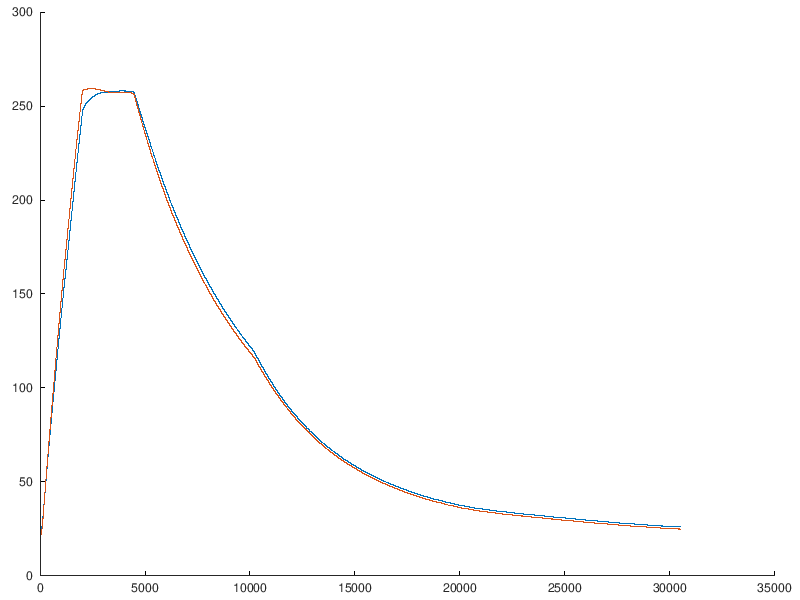

In [7]:
figure(1, 'position',[0, 0, 800, 600]);
%grid on
hold on
plot(x, line_1)
plot(x, line_2)
# plot([2000,2000], [0, 300])

Линейный участок примерно в [100, 2000]

Возьмём данные с запасом: [200, 1900]

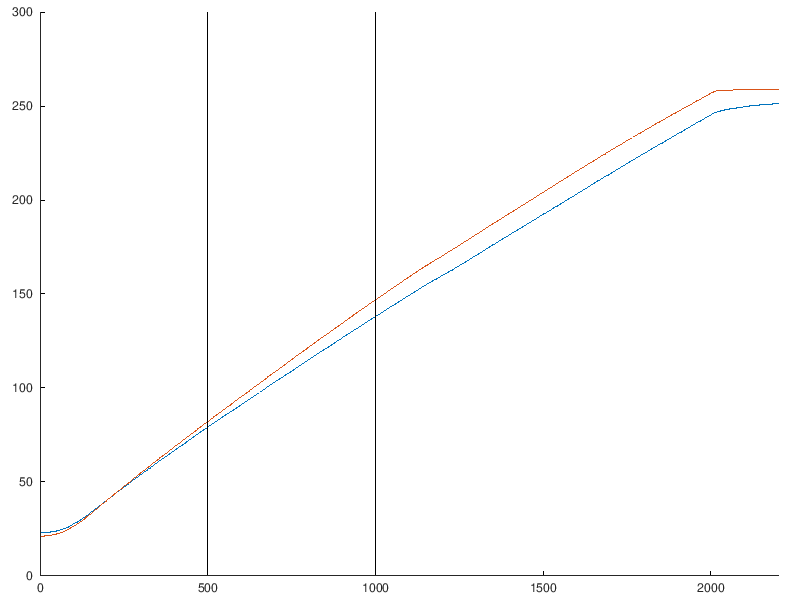

In [8]:
figure(1, 'position',[0, 0, 800, 600]);
%grid on
hold on
plot(x, line_1)
plot(x, line_2)
plot([1000, 1000], [0, 300], "k")
# plot([2000,2000], [0, 300])
# plot([100,100], [0, 300])
plot([500,500], [0, 300], "k")
xlim([0, 2200])

In [9]:
% left_threshold = 200
% right_threshold = 1900

left_threshold = 500
right_threshold = 1000


data_1 = line_1(left_threshold:right_threshold);
data_2 = line_2(left_threshold:right_threshold);
indexes = x(left_threshold:right_threshold);

left_threshold = 500
right_threshold = 1000


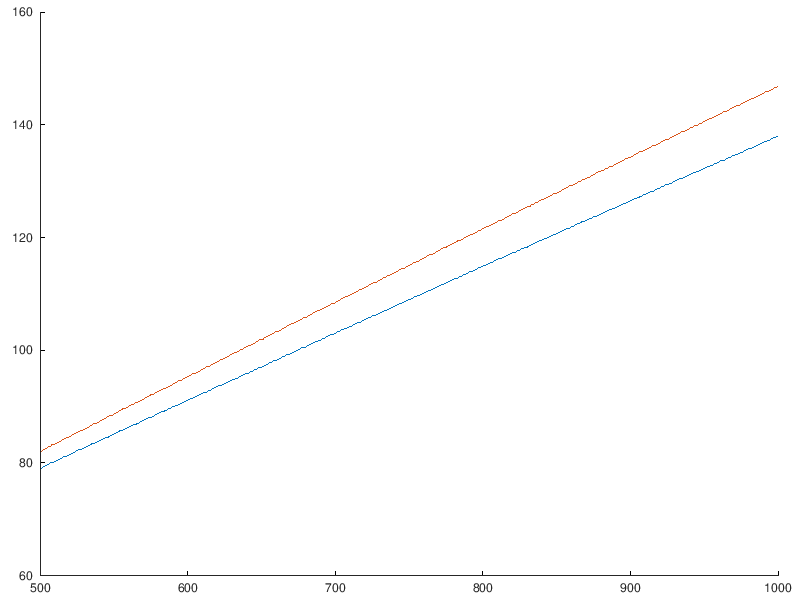

In [10]:
figure(1, 'position',[0, 0, 800, 600]);
hold on
plot(indexes, data_1)
plot(indexes, data_2)

In [11]:
pkg load interval

## Установить пути к функциям построения интервальной регрессии
addpath(genpath('./octave-interval-examples/m'))

Подробнее рассмотрим синий график:
отьерём первые 10 значений

n = 5
start_i = 1
step = 80
end_i = 400
inds =

     1    81   161   241   321



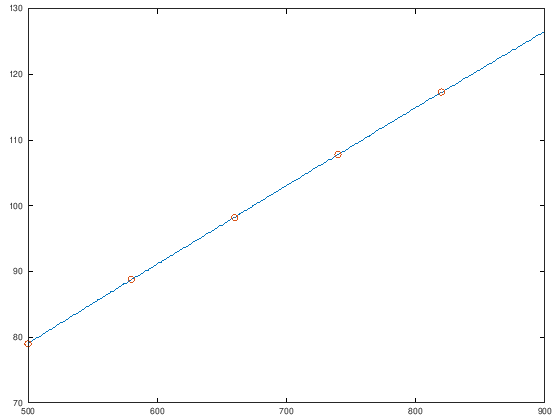

In [12]:
n = 5
start_i = 1
step = 80
end_i = step * n
inds = [start_i:step:end_i]

figure
plot(indexes(start_i:end_i), data_1(start_i:end_i), "-")
hold on
plot(indexes(inds), data_1(inds), "o")

In [13]:
## Определить задачу построения интервальной регрессии 
##     y = X * beta = beta1 + beta2 * x 
## с ограничением beta2 >= 0

x = indexes(inds);        # количество затраченного топлива
y = data_1(inds);        # объем произведенного пара

epsilon = zeros(1, n) + 0.1;  # верхняя граница ошибки для y_i

display(x)
display(y)
display(epsilon)

x = reshape(x, size(x)(2), size(x)(1));
y = reshape(y, size(y)(2), size(y)(1));
epsilon = reshape(epsilon, size(epsilon)(2), size(epsilon)(1));

X = [ x.^0 x ];                               # матрица значений переменных при beta1 и beta2
lb = [-inf 0];                                # нижние границы beta1 и beta2
irp_temp = ir_problem(X, y, epsilon, lb);    # создание переменной, содержащей описание задачи 
                                              #               построения интервальной регрессии


x =

   500   580   660   740   820

y =

    79.000    88.800    98.200   107.800   117.300

epsilon =

    0.1000    0.1000    0.1000    0.1000    0.1000



In [14]:
display(x)
display(y)
display(epsilon)

x =

   500
   580
   660
   740
   820

y =

    79.000
    88.800
    98.200
   107.800
   117.300

epsilon =

   0.1000
   0.1000
   0.1000
   0.1000
   0.1000



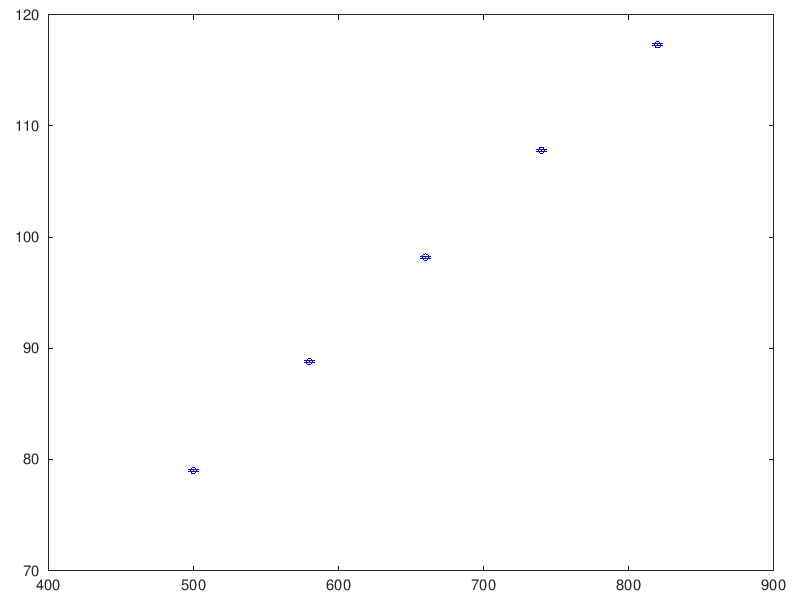

In [15]:
## График интервальных измерений
figure('position',[0, 0, 800, 600]);

ir_scatter(irp_temp);   
# xlim([0 22])
# ylim([-10 260])
set(gca, 'fontsize', 12)
#title('Steam generator performance');
#xlabel('Fuel consumption');
#ylabel('Steam quantity');

Можно добавить график обычной МНК регрессию

b_lsm =

   19.3500    0.1195

ans = -33.007


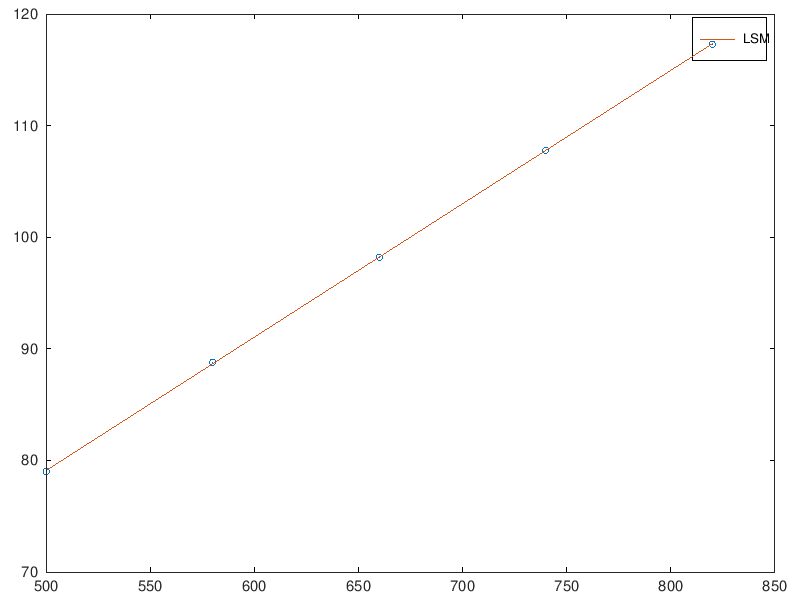

In [16]:
## Линейная регрессия МНК

b_lsm = (X \ y)'  
MNK_line = [b_lsm(1) + b_lsm(2) * min(x), b_lsm(1) + b_lsm(2) * max(x)];


figure('position',[0, 0, 800, 600]);

plot(x, y, "o")
hold on
plot([min(x),  max(x)], MNK_line)
# xlim([0 22])
# ylim([-10 260])
set(gca, 'fontsize', 12)
#title('Steam generator performance');
#xlabel('Fuel consumption');
#ylabel('Steam quantity');
legend("", "LSM")


QH6412 qhull input error (qh_initqhull_globals): expecting between 1 and 2147483631 points.  Got 0 0-d points

While executing:  | qhull Qt
Options selected for Qhull 2020.1 2020/05/29:
  run-id 1427955400  qh_QHpointer  Qtriangulate  _maxoutside  0
error: convhulln: qhull failed
error: called from
    ir_beta2poly at line 77 column 5
    ir_plotbeta at line 59 column 10


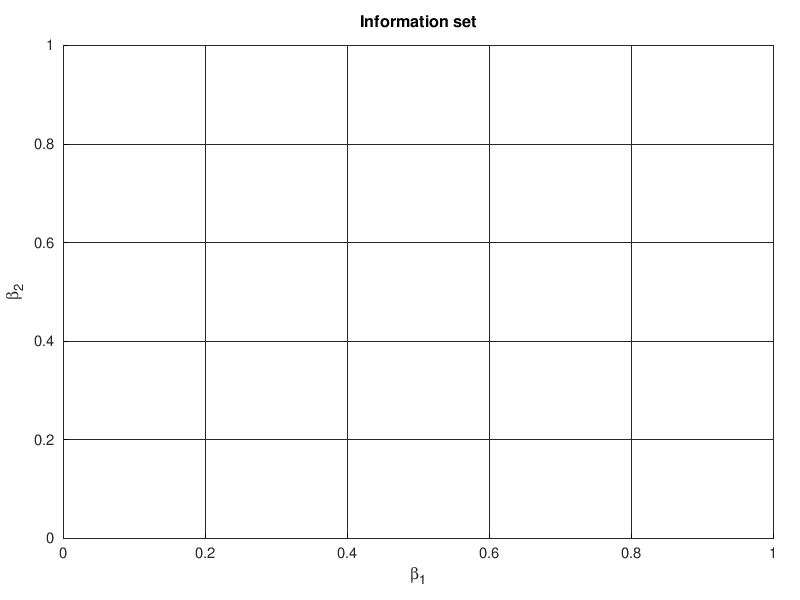

In [17]:
## Графическое представление информационного множества
figure('position',[0, 0, 800, 600]);
ir_plotbeta(irp_temp)
grid on
set(gca, 'fontsize', 12)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')

In [18]:
#ЗЛП
eps = epsilon
m = size(x)(1)
C = zeros(1, m + 2);
for i = 1:m
C(i) = 1;
end
display(C)
A = zeros(2*m, m+2);

for i = 1:m
A(2 * i - 1, i) = eps(i);
A(2 * i, i) = eps(i);

A(2 * i - 1, m + 1) = 1;
A(2 * i, m + 1) = -1;

A(2 * i - 1, m + 2) = x(i);
A(2 * i, m + 2) = -x(i);

end

display(A)

B = zeros(1, 2*m);
for i = 1:m
B(2 * i - 1) = y(i);
B(2 * i) = -y(i);
end

display(B)

lb = zeros(1, m+2);
for i = 1:m
lb(i) = 1;
end

lb(m+2) = -inf;

display(lb)

ctype = "";
for i = 1:2 * m
ctype(i) = 'L';
end

display(ctype)

vartype = "";
for i = 1:m + 2
vartype(i) = 'C';
end

display(vartype)

sense = 1

eps =

   0.1000
   0.1000
   0.1000
   0.1000
   0.1000

m = 5
C =

   1   1   1   1   1   0   0

A =

     0.1000          0          0          0          0     1.0000   500.0000
     0.1000          0          0          0          0    -1.0000  -500.0000
          0     0.1000          0          0          0     1.0000   580.0000
          0     0.1000          0          0          0    -1.0000  -580.0000
          0          0     0.1000          0          0     1.0000   660.0000
          0          0     0.1000          0          0    -1.0000  -660.0000
          0          0          0     0.1000          0     1.0000   740.0000
          0          0          0     0.1000          0    -1.0000  -740.0000
          0          0          0          0     0.1000     1.0000   820.0000
          0          0          0          0     0.1000    -1.0000  -820.0000

B =

 Columns 1 through 8:

    79.000   -79.000    88.800   -88.800    98.200   -98.200   107.800  -107.800

 Colu

In [19]:
w = glpk(C,A,B,lb,[],ctype,vartype,sense)

w =

    1.0000
    1.2500
    1.0000
    1.0000
    1.0000
   19.2562
    0.1197



scale = 1.2500
x =

   500
   580
   660
   740
   820

y =

    79.000
    88.800
    98.200
   107.800
   117.300

eps =

   0.1250
   0.1250
   0.1250
   0.1250
   0.1250



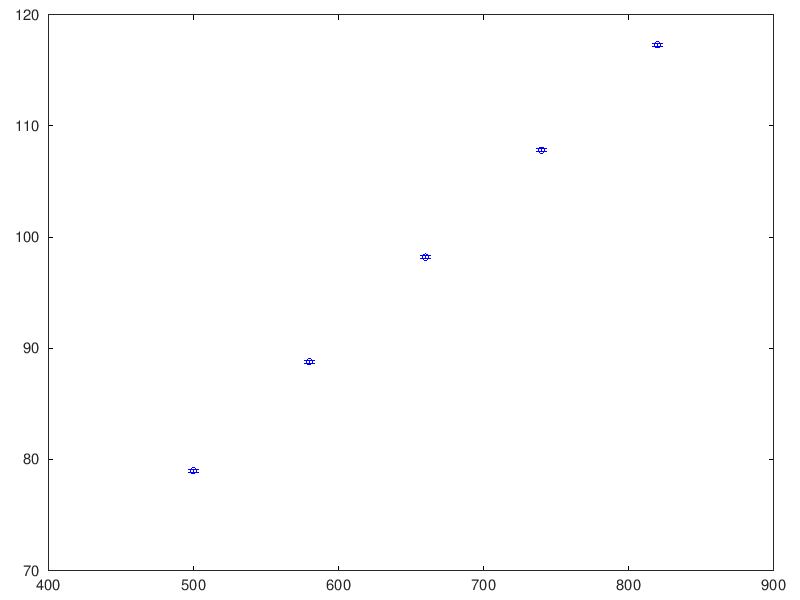

In [20]:
scale = max(w(1:n))
for i = 1:n
    eps(i) = epsilon(i) * scale;
end

display(x)
display(y)
display(eps)


X = [ x.^0 x ];                               # матрица значений переменных при beta1 и beta2
lb = [-inf 0];                                # нижние границы beta1 и beta2
irp_temp = ir_problem(X, y, eps, lb);    # создание переменной, содержащей описание задачи 
                                              #               построения интервальной регрессии



## График интервальных измерений
figure('position',[0, 0, 800, 600]);

ir_scatter(irp_temp);   
# xlim([0 22])
# ylim([-10 260])
set(gca, 'fontsize', 12)
#title('Steam generator performance');
#xlabel('Fuel consumption');
#ylabel('Steam quantity');


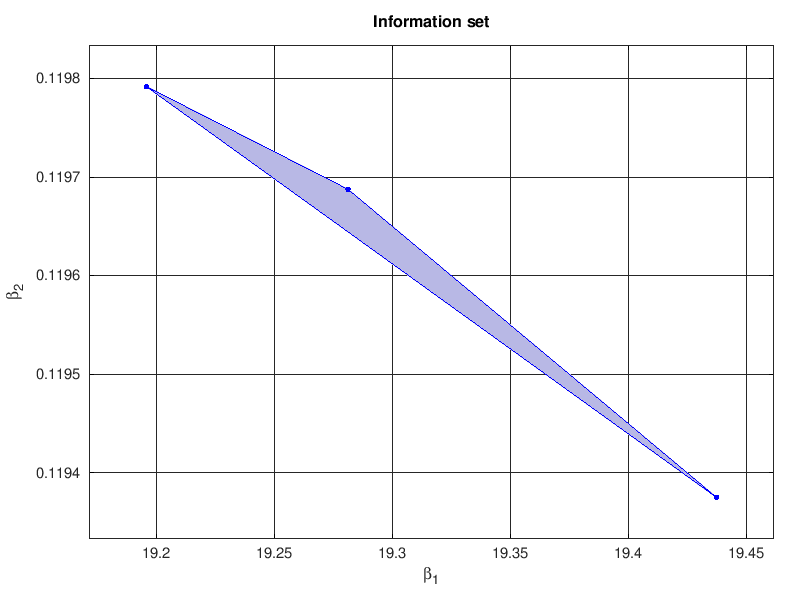

In [21]:
## Графическое представление информационного множества
figure('position',[0, 0, 800, 600]);
ir_plotbeta(irp_temp)
grid on
set(gca, 'fontsize', 12)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')


In [22]:
## Вершины информационного множества задачи построения интервальной регрессии
vertices = ir_beta2poly(irp_temp)

## Диаметр и наиболее удаленные вершины информационного множества 
[rhoB, b1, b2] = ir_betadiam(irp_temp)

vertices =

   19.1958    0.1198
   19.4375    0.1194
   19.2812    0.1197

rhoB = 0.2417
b1 =

   19.4375    0.1194

b2 =

   19.1958    0.1198



In [23]:
## Внешние интервальние оценки параметров модели y = beta1 + beta2 * x 
b_int = ir_outer(irp_temp)

b_int =

   19.1958   19.4375
    0.1194    0.1198



In [24]:
## Точечные оценки параметров 
b_maxdiag = (b1 + b2) / 2    # как середина наибольшей диагонали информационного множества

b_gravity = mean(vertices)   # как центр тяжести информационного множества 

b_lsm = (X \ y)'             # методом наименьших квадратов

b_maxdiag =

   19.3167    0.1196

b_gravity =

   19.3049    0.1196

b_lsm =

   19.3500    0.1195



ans = -29.285


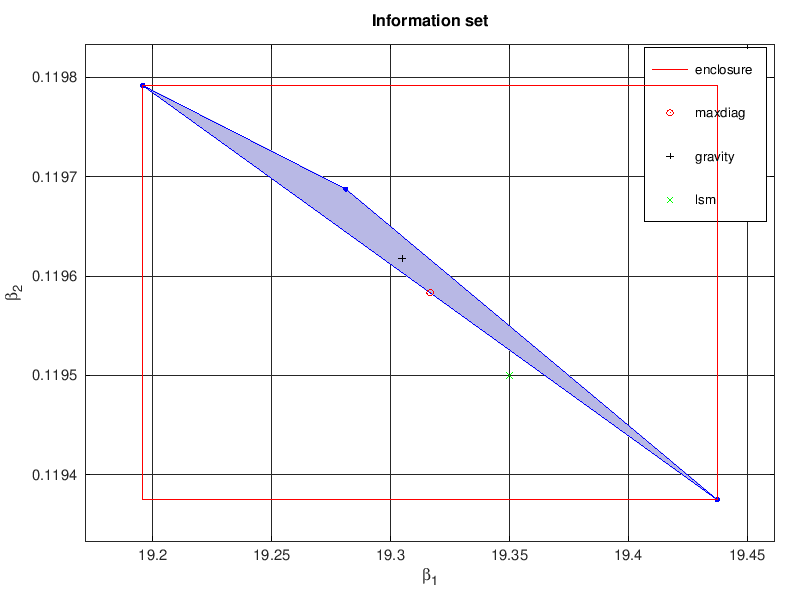

In [25]:
## Графическое представление внешней интервальной оценки информационного множества
figure('position',[0, 0, 800, 600]);
ir_plotbeta(irp_temp)
hold on
ir_plotrect(b_int,'r-')
grid on
set(gca, 'fontsize', 12)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')

## Точечные оценки
plot(b_maxdiag(1), b_maxdiag(2), 'ro')
plot(b_gravity(1), b_gravity(2), 'k+')
plot(b_lsm(1), b_lsm(2), 'gx')
legend("", "", "enclosure", "maxdiag",  "gravity", "lsm")


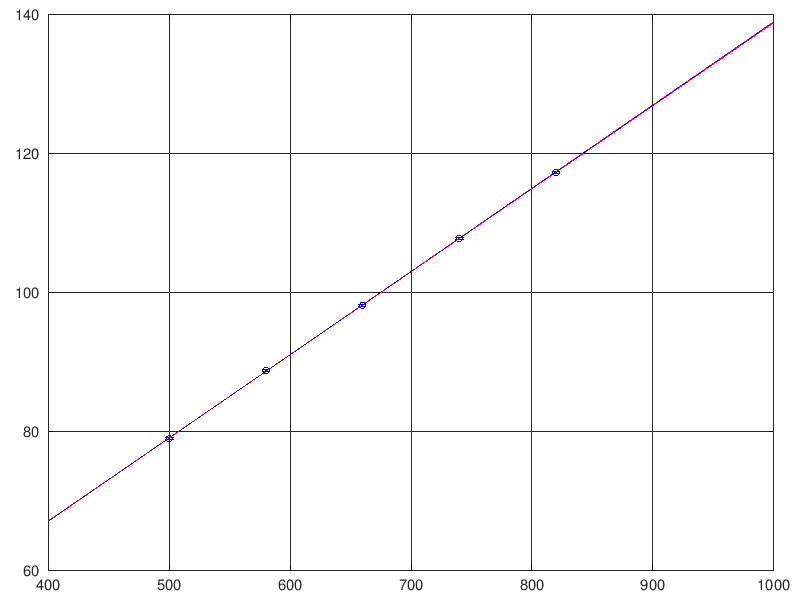

In [26]:
## Графическое представление коридора совместных зависимостей для модели y = beta1 + beta2 * x
figure('position',[0, 0, 800, 600]);
xlimits = [400 1000];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей

hold on
ir_scatter(irp_temp,'bo')              # интервальные измерения
ir_plotline(b_maxdiag, xlimits, 'r-')   # зависимость с параметрами, оцененными как центр наибольшей диагонали ИМ
ir_plotline(b_gravity, xlim, 'b--')     # зависимость с параметрами, оцененными как центр тяжести ИМ  
# ir_plotline(b_lsm, xlim, 'b--')         # зависимость с параметрами, оцененными МНК
# ir_scatter(ir_problem(Xp,ypmid,yprad),'ro')

grid on
set(gca, 'fontsize', 12)
# xlabel('Fuel consumtion')
# ylabel('Steam quantity')
# title('Set of models compatible with data and constraints')

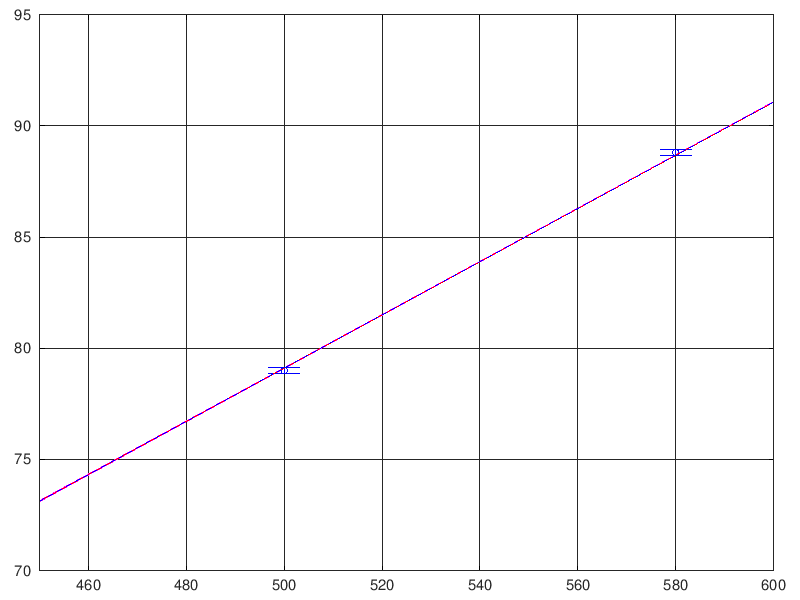

In [27]:
## Графическое представление коридора совместных зависимостей для модели y = beta1 + beta2 * x
figure('position',[0, 0, 800, 600]);
xlimits = [400 1000];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей

hold on
ir_scatter(irp_temp,'bo')              # интервальные измерения
ir_plotline(b_maxdiag, xlimits, 'r-')   # зависимость с параметрами, оцененными как центр наибольшей диагонали ИМ
ir_plotline(b_gravity, xlim, 'b--')     # зависимость с параметрами, оцененными как центр тяжести ИМ  
# ir_plotline(b_lsm, xlim, 'b--')         # зависимость с параметрами, оцененными МНК
# ir_scatter(ir_problem(Xp,ypmid,yprad),'ro')

grid on
set(gca, 'fontsize', 12)
# xlabel('Fuel consumtion')
# ylabel('Steam quantity')
# title('Set of models compatible with data and constraints')

xlim([450, 600])
ylim([70, 95])

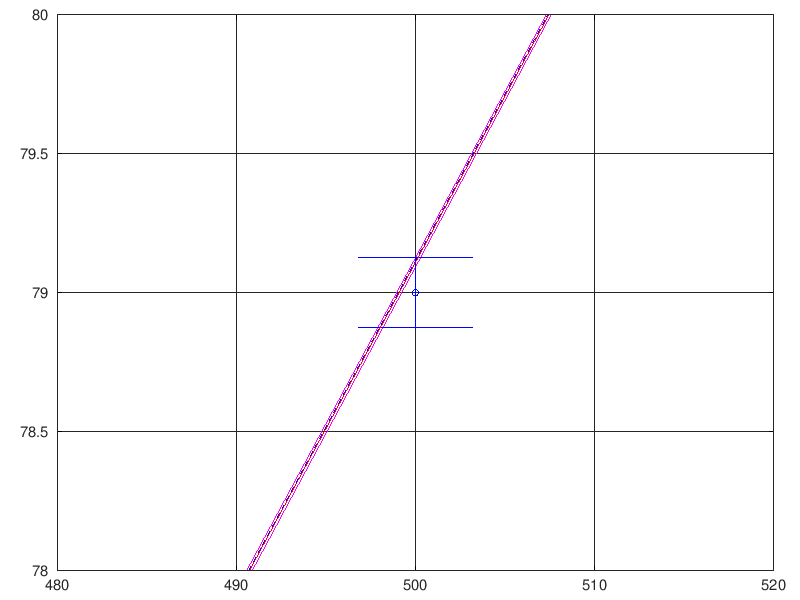

In [28]:
## Графическое представление коридора совместных зависимостей для модели y = beta1 + beta2 * x
figure('position',[0, 0, 800, 600]);
xlimits = [400 1000];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей

hold on
ir_scatter(irp_temp,'bo')              # интервальные измерения
ir_plotline(b_maxdiag, xlimits, 'r-')   # зависимость с параметрами, оцененными как центр наибольшей диагонали ИМ
ir_plotline(b_gravity, xlim, 'b--')     # зависимость с параметрами, оцененными как центр тяжести ИМ  
# ir_plotline(b_lsm, xlim, 'b--')         # зависимость с параметрами, оцененными МНК
# ir_scatter(ir_problem(Xp,ypmid,yprad),'ro')

grid on
set(gca, 'fontsize', 12)
# xlabel('Fuel consumtion')
# ylabel('Steam quantity')
# title('Set of models compatible with data and constraints')

xlim([480, 520])
ylim([78, 80])

In [29]:
## Значения y, предсказанные с помощью модели y = beta1 + beta2 * x в точках эксперимента
yp0 = ir_predict(irp_temp, X)       # интервальный прогноз значений y в точках x

yp0mid = mean(yp0,2)                 # средние значения прогнозных интервалов
yp0rad = 0.5 * (yp0(:,2) - yp0(:,1)) # радиус прогнозных интервалов

yp0rad_rel = 100 * yp0rad ./ yp0mid  # относительная величина неопределенности прогнозов в процентах

yp0 =

    79.092    79.125
    88.675    88.700
    98.225    98.275
   107.775   107.850
   117.325   117.425

yp0mid =

    79.108
    88.688
    98.250
   107.813
   117.375

yp0rad =

   0.016668
   0.012501
   0.025002
   0.037503
   0.050005

yp0rad_rel =

   0.021070
   0.014096
   0.025448
   0.034786
   0.042602



In [30]:
## Значения y, предсказанные с помощью модели y = beta1 + beta2 * x
xp = [250; 450; 600; 950; 1800]
Xp = [xp.^0 xp];

yp = ir_predict(irp_temp, Xp)         # интервальный прогноз значений y в точках xp
ypmid = mean(yp,2)                     # средние значения прогнозных интервалов
yprad = 0.5 * (yp(:,2) - yp(:,1))      # радиус прогнозных интервалов

yprad_relative = 100 * yprad ./ ypmid  # относительная величина неопределенности прогнозов в процентах

xp =

    250
    450
    600
    950
   1800

yp =

    49.144    49.281
    73.102    73.156
    91.063    91.094
   132.844   132.998
   234.312   234.821

ypmid =

    49.213
    73.129
    91.078
   132.921
   234.567

yprad =

   0.068756
   0.027086
   0.015626
   0.077090
   0.254190

yprad_relative =

   0.139713
   0.037038
   0.017157
   0.057997
   0.108366



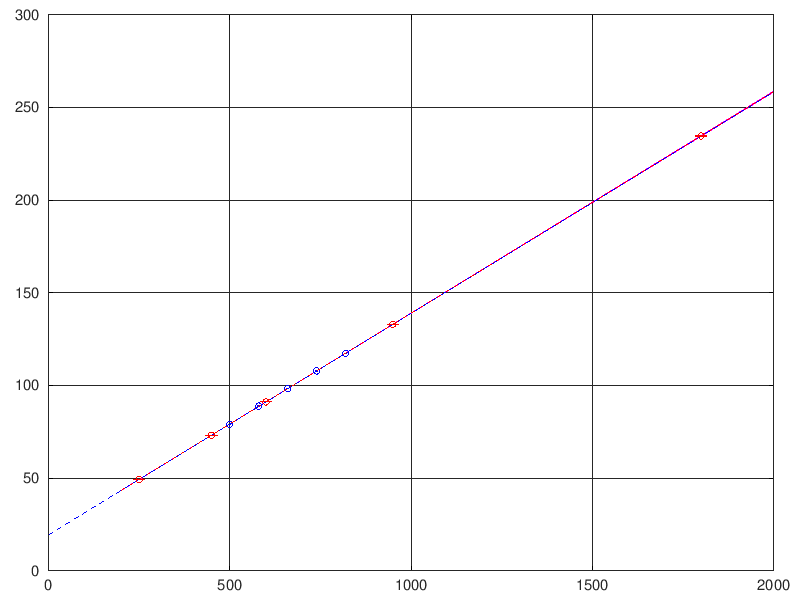

In [32]:
## Графическое представление коридора совместных зависимостей для модели y = beta1 + beta2 * x
figure('position',[0, 0, 800, 600]);
xlimits = [200 2000];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей

hold on
ir_scatter(irp_temp,'bo')              # интервальные измерения
ir_plotline(b_maxdiag, xlimits, 'r-')   # зависимость с параметрами, оцененными как центр наибольшей диагонали ИМ
ir_plotline(b_gravity, xlim, 'b--')     # зависимость с параметрами, оцененными как центр тяжести ИМ  
# ir_plotline(b_lsm, xlim, 'b--')         # зависимость с параметрами, оцененными МНК
ir_scatter(ir_problem(Xp,ypmid,yprad),'ro')

grid on
set(gca, 'fontsize', 12)

In [33]:
# Поиск граничных точек
MY_EPS = 0.00001;
## Значения y, предсказанные с помощью модели y = beta1 + beta2 * x в точках эксперимента
irp_temp;
cur_x = irp_temp.y;
cur_eps = irp_temp.epsilon;

yp0 = ir_predict(irp_temp, X); 

for i = 1:n
x_top = cur_x(i) + cur_eps(i);
x_bot = cur_x(i) - cur_eps(i);

y_top = yp0(i, 2);
y_bot = yp0(i, 1);

if abs(y_top - x_top) < MY_EPS
    display(i)
    
end

if abs(y_bot - x_bot) < MY_EPS
    display(i)
end


end



i = 1
i = 2
i = 5


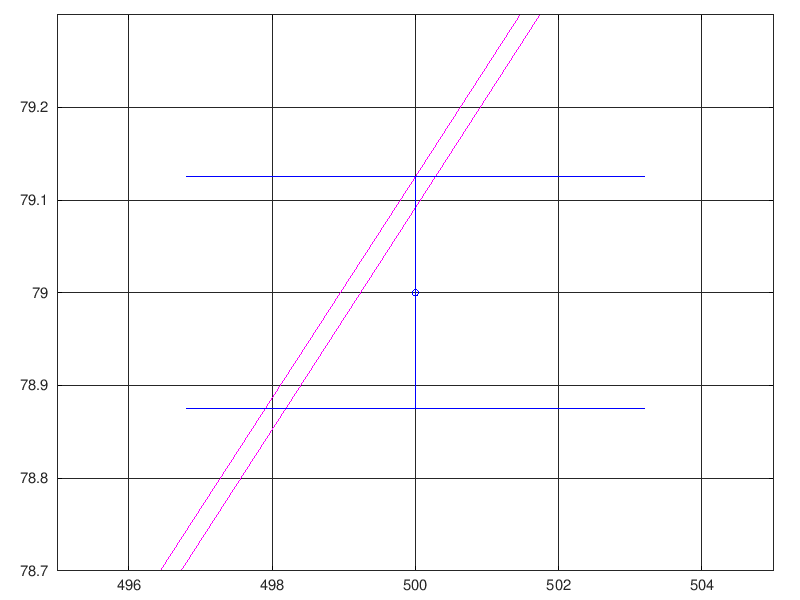

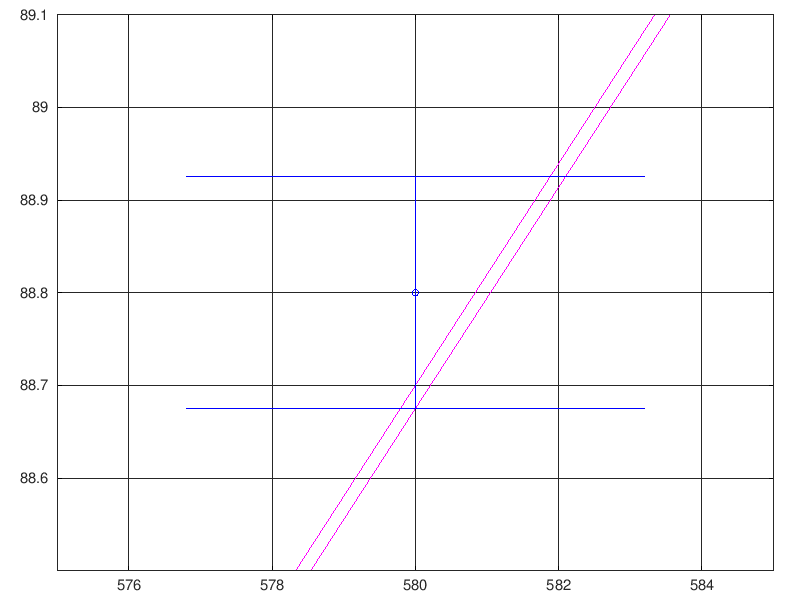

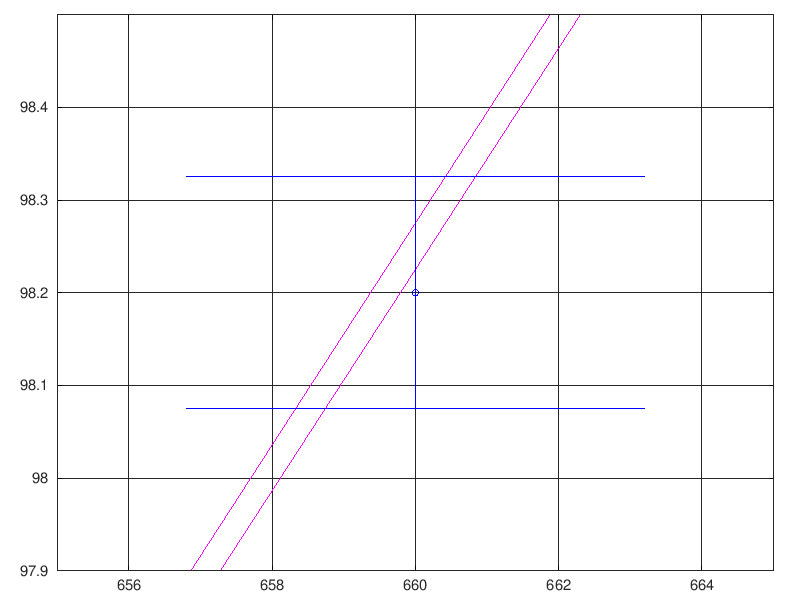

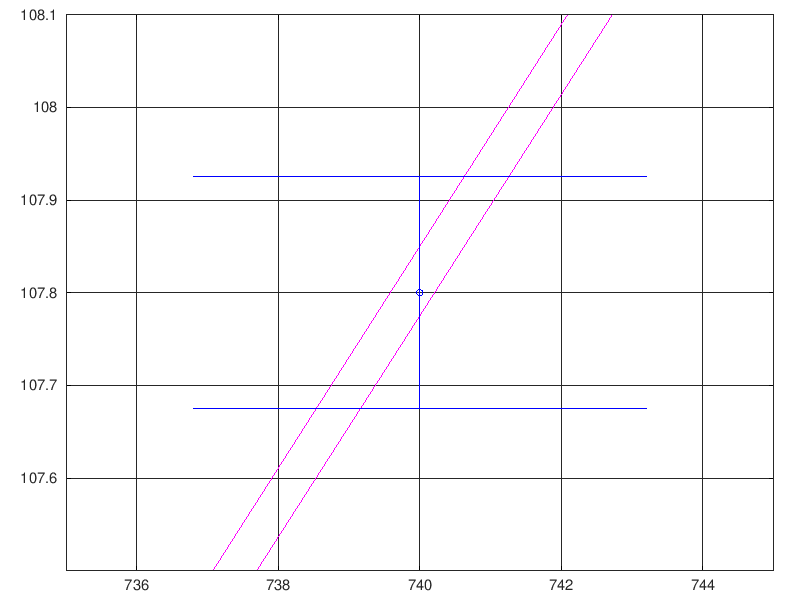

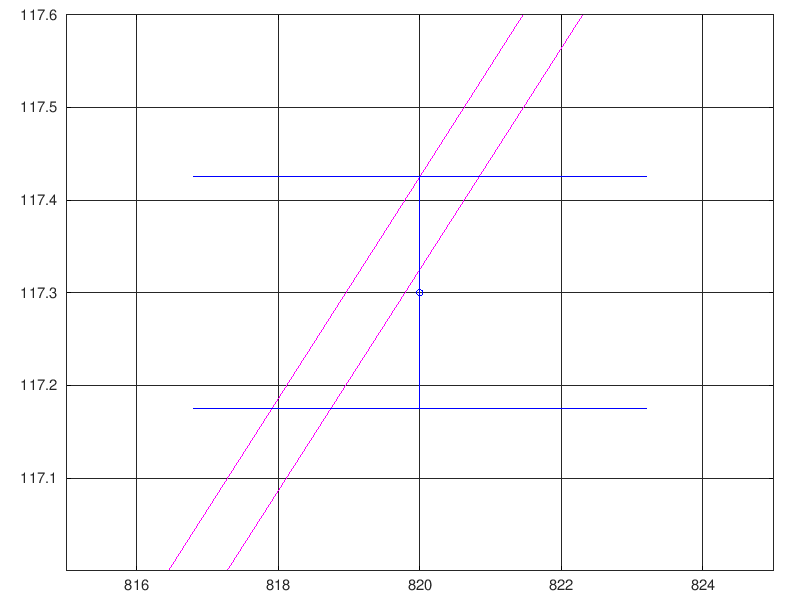

In [34]:
border_x = [-5, 5];
border_y = [-0.3, 0.3];

for i = 1:m

cur_point_x = x(i);
cur_point_y = y(i);

figure('position',[0, 0, 800, 600]);
xlimits = [400 1000];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей
hold on
ir_scatter(irp_temp,'bo')              # интервальные измерения
grid on
set(gca, 'fontsize', 12)

xlim([cur_point_x + border_x(1), cur_point_x + border_x(2)]);
ylim([cur_point_y + border_y(1), cur_point_y + border_y(2)]);


end